In [1]:
import slam
from importlib import reload

xFormers not available
xFormers not available


In [2]:
model, matching = slam.get_models()

In [3]:
image_prefix = "indoor1"

In [4]:
# slam.sample_video(image_prefix)

In [5]:
reload(slam)
images = slam.get_images(image_prefix)
match_inputs = [slam.preprocess_image_matcher(x) for x in images]
depth_inputs = [slam.preprocess_image_depth(x) for x in images]
depths = [slam.get_depth(image=x, model=model) for x in depth_inputs]

['./images/indoor1/img00001.jpg', './images/indoor1/img00002.jpg', './images/indoor1/img00003.jpg', './images/indoor1/img00004.jpg', './images/indoor1/img00005.jpg', './images/indoor1/img00006.jpg']


In [17]:
from SuperGlue.models.superpoint import SuperPoint 
from SuperGlue.models.superglue import SuperGlue 
import torch

superpoint = SuperPoint()
superglue = SuperGlue()

superpoint.load_state_dict(torch.load('./models/superpoint_v1.pth')) 
superglue.load_state_dict(torch.load('./models/superglue_indoor.pth'))

superpoint.eval()
superglue.eval()

img0 = match_inputs[0]
img1 = match_inputs[1]

traced_superpoint = torch.jit.trace(superpoint, img0)

kpts0, scores0, desc0 = superpoint(img0)
kpts1, scores1, desc1 = superpoint(img1)

example_inputs = (img0, img1, kpts0, kpts1, desc0, desc1, scores0, scores1)

traced_superglue = torch.jit.trace(superglue, example_inputs)



In [6]:
reload(slam)
matches = slam.get_matches(inputs=match_inputs, model=matching, num_matches=-1)
matches_3d = slam.project_matches_to_3d(matches, depths, camera_params=slam.iPhone15ProSquareVideoCamera())

<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>


In [7]:
transforms = [slam.get_transform(m[0], m[1]) for m in matches_3d]
angles = [slam.decompose_rotation_matrix(t[0]) for t in transforms]
elevation = [a[2] for a in angles]
azimuth = [a[1] for a in angles]

for i, (a, t) in enumerate(zip(angles, transforms)):
    x,y,z = a
    print(str(i) + ": {: <15}".format(f"x deg {x:.3f}") + "{: <15}".format(f"y deg {y:.3f}") + "{: <15}".format(f"z deg {z:.3f}"))

print()
for i, (a, t) in enumerate(zip(angles, transforms)):
    x,y,z = t[1]
    print(str(i) + ": {: <15}".format(f"x {x:.3f}") + "{: <15}".format(f"y {y:.3f}") + "{: <15}".format(f"z {z:.3f}"))


0: x deg 0.664    y deg 7.256    z deg -4.617   
1: x deg 2.872    y deg 18.792   z deg -0.416   
2: x deg 2.036    y deg 17.366   z deg -2.732   
3: x deg -0.875   y deg 10.570   z deg -3.782   
4: x deg -0.110   y deg 8.192    z deg -5.255   

0: x -0.175       y -0.012       z 0.173        
1: x 0.253        y -0.150       z -0.392       
2: x 0.127        y -0.144       z -0.058       
3: x -0.137       y 0.015        z -0.113       
4: x -0.167       y 0.065        z -0.261       


In [8]:
['self', 'cross'] * 9

['self',
 'cross',
 'self',
 'cross',
 'self',
 'cross',
 'self',
 'cross',
 'self',
 'cross',
 'self',
 'cross',
 'self',
 'cross',
 'self',
 'cross',
 'self',
 'cross']

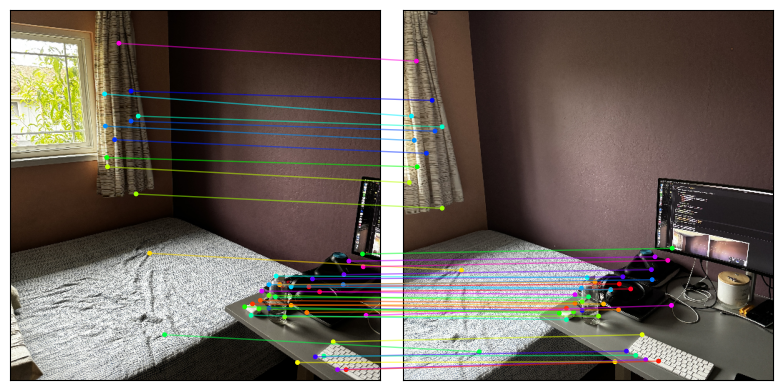

In [9]:
idx = 4
fig = slam.plot_matches(idx, images, matches)

In [10]:
# fig = create_pcd_fig(idx, depths, images)
# fig.show()

In [11]:
reload(slam)
data = slam.training_preprocessor(
    image_prefix=image_prefix, 
    model=model,
    matching=matching,
    camera_params=slam.iPhone15ProSquareVideoCamera(),
    force_reload=True)

['./images/indoor1/img00001.jpg', './images/indoor1/img00002.jpg', './images/indoor1/img00003.jpg', './images/indoor1/img00004.jpg', './images/indoor1/img00005.jpg', './images/indoor1/img00006.jpg']
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>


In [12]:
reload(slam)
slam.visualize_camera_poses(data=data)